**Jupyter Notebook Example: Logistic Regression for Customer Churn Prediction**

**1. Introduction to Logistic Regression**

*   **Concept:** Logistic regression is a classification algorithm used to predict the probability of a binary outcome. Unlike linear regression, which predicts continuous values, logistic regression predicts categories or classes. It's especially used when the outcome is binary (two possible outcomes), like "yes" or "no," "true" or "false," "churn" or "not churn."

*   **Why not Linear Regression for Classification?** You might wonder, why not just use linear regression and set a threshold?  If we predict a house price above $300,000, classify it as "expensive," otherwise "cheap."  While conceptually simple, linear regression outputs values that are not bounded between 0 and 1, making them unsuitable for probabilities. Also, for binary classification, the errors in linear regression won't behave nicely.

*   **Analogy:** Imagine you want to predict if a customer will churn (cancel their subscription) or not. You might look at factors like how long they've been a customer, their monthly spending, and their usage. Logistic regression tries to predict the *probability* of churn. For example, it might predict a 0.8 probability of churn for one customer and 0.2 for another. We then set a threshold (like 0.5) to classify customers: probability > 0.5 as "churn," and probability <= 0.5 as "not churn."

*   **The Sigmoid Function (Key to Logistic Regression):** Logistic regression uses a special function called the **sigmoid function** (or logistic function).  This function takes any real number as input and outputs a value between 0 and 1. This output is interpreted as a probability.

    The sigmoid function looks like this:

    ```
    σ(z) = 1 / (1 + e^(-z))
    ```

    Where:
    *   `σ(z)` is the sigmoid function output (probability).
    *   `z` is the linear combination of input features (similar to `mx + c` in linear regression, but potentially with multiple features).
    *   `e` is the base of the natural logarithm (approximately 2.71828).

    In logistic regression, we calculate `z` as a linear combination of our features: `z = w1*x1 + w2*x2 + ... + wn*xn + b`, where `x1, x2, ..., xn` are features, `w1, w2, ..., wn` are weights (coefficients), and `b` is the bias (intercept).  Then we pass `z` through the sigmoid function to get a probability.

*   **Goal:** The goal of logistic regression is to find the optimal weights (`w1, w2, ..., wn`) and bias (`b`) that best separate the two classes in our data.  This is typically done by maximizing the "likelihood" of observing the actual outcomes in our training data given the model's predicted probabilities.

**2. Use Case: Predicting Customer Churn**

*   **Scenario:** Let's say you're working for a telecommunications company. You want to predict which customers are likely to churn (stop using your services). You have historical data on customer behavior, including:
    *   **Contract Length:** How long they've been on a contract (e.g., month-to-month, one year, two year).
    *   **Monthly Charges:** How much they pay per month.
    *   **Data Usage:**  Average monthly data usage.
    *   ... and whether they ultimately churned or not.

*   **Dataset (Example - Synthetic):**

    | Contract Length (months) | Monthly Charges ($) | Data Usage (GB) | Churn (Yes/No) |
    |--------------------------|---------------------|-----------------|----------------|
    | 12                       | 60                  | 50              | No             |
    | 1                        | 80                  | 100             | Yes            |
    | 24                       | 45                  | 30              | No             |
    | 1                        | 90                  | 120             | Yes            |
    | 36                       | 55                  | 40              | No             |
    | ...                      | ...                 | ...             | ...            |

**3. Python Code in Jupyter Notebook**

Let's get to the code!

**Step 1: Import Libraries**

We'll need similar libraries as before, but we'll use `LogisticRegression` from `sklearn.linear_model` and `accuracy_score` for evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # for better visualizations


**Step 2: Create Synthetic Data**

Let's create some synthetic customer churn data.


In [2]:
np.random.seed(0)

# Number of samples
n_samples = 200

# Contract length (months): shorter contracts might mean higher churn
contract_length = np.random.randint(1, 37, n_samples) # 1 to 36 months
monthly_charges = np.random.uniform(30, 120, n_samples) # $30 to $120
data_usage = np.random.uniform(20, 150, n_samples) # 20GB to 150GB

# Simulate churn: Higher charges, shorter contracts, higher usage might increase churn probability
churn_probability = (1 / (1 + np.exp(-(0.1 * data_usage + 0.05 * monthly_charges - 0.2 * contract_length - 4)))) # Sigmoid-like function to generate probabilities
churn = np.random.binomial(1, churn_probability) # 1=Churn, 0=No Churn

# Create DataFrame
data = pd.DataFrame({
    'ContractLength': contract_length,
    'MonthlyCharges': monthly_charges,
    'DataUsage': data_usage,
    'Churn': churn
})

# Convert 'Churn' to categorical for better readability later if needed (optional)
data['Churn'] = data['Churn'].map({0: 'No', 1: 'Yes'})

print(data.head())

   ContractLength  MonthlyCharges   DataUsage Churn
0               1       71.710588  119.705256   Yes
1               4      108.711566   21.269637   Yes
2               4      114.970778   60.077202   Yes
3              10       84.742758   50.272511   Yes
4              20       83.698987   85.445566   Yes



**Explanation:**

*   We generate synthetic data for `ContractLength`, `MonthlyCharges`, and `DataUsage` using random number generators.
*   We create `churn_probability` using a sigmoid-like function that makes churn more likely for customers with higher data usage and monthly charges, and shorter contract lengths.  This is just a way to create data that has some plausible relationships.
*   `np.random.binomial(1, churn_probability)` uses the `churn_probability` to decide whether each customer churns (1) or not (0).
*   We create a Pandas DataFrame and convert the 'Churn' column to 'Yes'/'No' for better readability (optional).

**Step 3: Visualize the Data**

Let's visualize the relationships. We can use box plots to see how features vary for churned vs. non-churned customers.


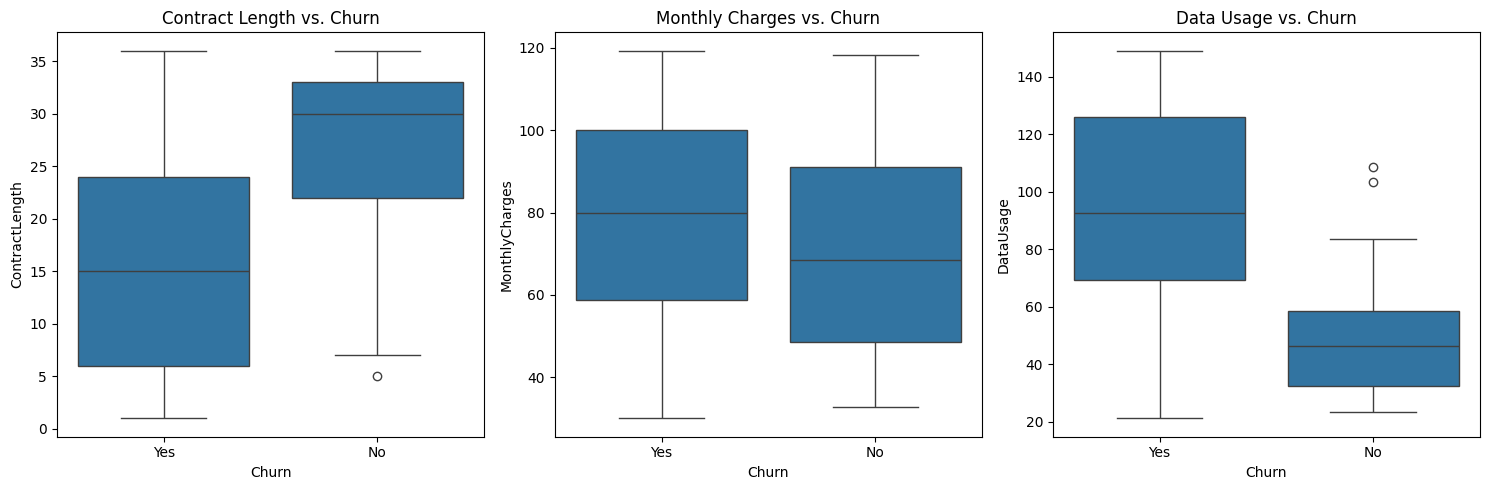

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='Churn', y='ContractLength', data=data, ax=axes[0])
axes[0].set_title('Contract Length vs. Churn')

sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1])
axes[1].set_title('Monthly Charges vs. Churn')

sns.boxplot(x='Churn', y='DataUsage', data=data, ax=axes[2])
axes[2].set_title('Data Usage vs. Churn')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()


**Explanation:**

*   We use `seaborn.boxplot` to create box plots. Box plots are great for comparing distributions of numerical features across different categories (here, 'Churn' categories: 'Yes' and 'No').
*   We plot box plots for `ContractLength`, `MonthlyCharges`, and `DataUsage`, each against 'Churn'.

*You should observe trends in the box plots that align with our churn simulation logic. For example, churned customers might tend to have shorter contract lengths and possibly higher monthly charges and data usage in this synthetic data.*

**Step 4: Prepare Data (Features and Target)**


In [4]:
X = data[['ContractLength', 'MonthlyCharges', 'DataUsage']] # Features
y = data['Churn'] # Target


**Step 5: Split into Training and Testing Sets**


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y to maintain class proportions
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True)) # Class proportions
print("\nClass distribution in testing set:\n", y_test.value_counts(normalize=True))

Training set size: 160
Testing set size: 40

Class distribution in training set:
 Churn
Yes    0.79375
No     0.20625
Name: proportion, dtype: float64

Class distribution in testing set:
 Churn
Yes    0.8
No     0.2
Name: proportion, dtype: float64



**Explanation:**

*   `stratify=y` in `train_test_split` is important for classification, especially if your classes are imbalanced. It ensures that the proportions of 'Churn' and 'No Churn' are roughly the same in both the training and testing sets as they are in the original dataset. This helps to get a more representative evaluation.

**Step 6: Train the Logistic Regression Model**


In [6]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("\nLogistic Regression Model Trained!")


Logistic Regression Model Trained!



**Step 7: Make Predictions**


In [7]:

y_pred = model.predict(X_test)


**Step 8: Evaluate the Model**

For classification, **accuracy** is a common metric, but we should also look at **confusion matrix** and **classification report** for a more complete picture, especially if classes are imbalanced or if different types of errors (false positives vs. false negatives) have different costs.


Accuracy on Test Set: 0.88

Confusion Matrix:
 [[ 5  3]
 [ 2 30]]

Classification Report:
               precision    recall  f1-score   support

          No       0.71      0.62      0.67         8
         Yes       0.91      0.94      0.92        32

    accuracy                           0.88        40
   macro avg       0.81      0.78      0.79        40
weighted avg       0.87      0.88      0.87        40



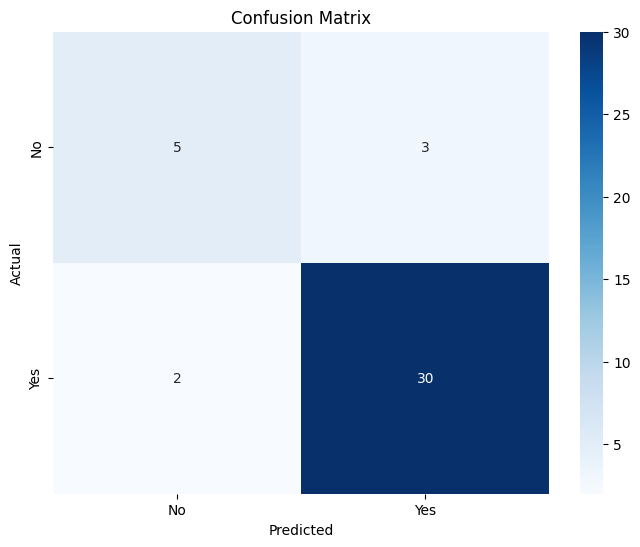

In [8]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix using heatmap (optional but helpful)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Explanation:**

*   `accuracy_score(y_test, y_pred)`: Calculates the accuracy, which is the percentage of correctly classified instances.
*   `confusion_matrix(y_test, y_pred)`:  Gives you a table showing:
    *   True Positives (TP): Correctly predicted 'Yes' (Churn)
    *   True Negatives (TN): Correctly predicted 'No' (No Churn)
    *   False Positives (FP): Incorrectly predicted 'Yes' (Type I error - predicted churn when no churn)
    *   False Negatives (FN): Incorrectly predicted 'No' (Type II error - predicted no churn when churn occurred)
*   `classification_report(y_test, y_pred)`: Provides precision, recall, F1-score, and support for each class.
    *   **Precision:**  Out of all instances predicted as positive (e.g., 'Churn'), how many were actually positive? (TP / (TP + FP)) - Lower false positives mean higher precision.
    *   **Recall (Sensitivity):** Out of all actual positive instances, how many were correctly predicted as positive? (TP / (TP + FN)) - Lower false negatives mean higher recall.
    *   **F1-score:**  Harmonic mean of precision and recall. A balanced measure.
    *   **Support:** Number of actual instances in each class in the test set.
*   `sns.heatmap(...)`: Creates a heatmap visualization of the confusion matrix, which makes it easier to interpret.

**Step 9: Predict Churn for a New Customer**


In [9]:

new_customer = pd.DataFrame({
    'ContractLength': [6],      # months
    'MonthlyCharges': [75],     # $
    'DataUsage': [90]         # GB
})

predicted_churn_probability = model.predict_proba(new_customer) # Get probabilities
predicted_churn_class = model.predict(new_customer)          # Get class prediction

print(f"Predicted Churn Probability for New Customer:\n{predicted_churn_probability}") # Probabilities for [No Churn, Churn]
print(f"\nPredicted Churn Class for New Customer: {predicted_churn_class[0]}") # Predicted class ('Yes' or 'No')

Predicted Churn Probability for New Customer:
[[4.39973542e-04 9.99560026e-01]]

Predicted Churn Class for New Customer: Yes



**Explanation:**

*   We create a DataFrame `new_customer` with features for a new customer. **Remember to put the features in a DataFrame with column names matching your training features.**
*   `model.predict_proba(new_customer)`:  Predicts the probabilities for each class (No Churn and Churn). It returns an array like `[[probability of No Churn, probability of Churn]]`.
*   `model.predict(new_customer)`: Predicts the class directly ('Yes' or 'No') based on the default threshold of 0.5 for probability.

**4. Complete Jupyter Notebook Code**



**5. Conclusion**

This example demonstrated how to build a logistic regression model to predict customer churn.

1.  **Classification vs. Regression:** The difference in prediction goals.
2.  **Logistic Regression Concept:** How it uses the sigmoid function to predict probabilities for binary outcomes.
3.  **Use Case:**  Predicting customer churn – a practical application.
4.  **Evaluation Metrics for Classification:** Accuracy, confusion matrix, and classification report.
5.  **Making Predictions:**  Using the trained model for new data.

Logistic regression is a powerful and interpretable algorithm for binary classification tasks and is widely used in many domains. You can further explore feature engineering, try different models, and handle more complex real-world datasets as you expand your machine learning skills!